**Mise en forme des données**

In [2]:
import numpy as np
import pandas as pd

uci = pd.read_csv('UCI_Credit_Card.csv', delimiter=',')
print(uci.values.shape)
X = uci.values[:, 1:-1]
Y = uci.values[:,-1]

size = len(Y)

perm = np.arange(size)
np.random.shuffle(perm)

X_train = X[perm[0:20000], :]
Y_train = Y[perm[0:20000]]
X_val = X[perm[20000:25000],:]
Y_val = Y[perm[20000:25000]]
X_test = X[perm[25000:], :]
Y_test = Y[perm[25000:]]

X_train_val = X[perm[0:25000]]
Y_train_val = Y[perm[0:25000]]

print(f'{X_train.shape} training samples, {X_val.shape} validation sampels, {X_test.shape} test samples')

(30000, 25)
(20000, 23) training samples, (5000, 23) validation sampels, (5000, 23) test samples


**Affichage des données en 2D**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#0000FF', '#FF0000'])

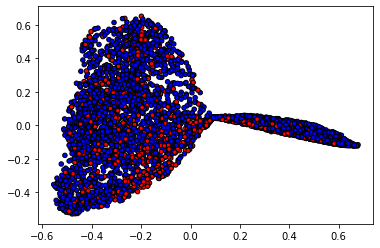

In [ ]:
minmax = MinMaxScaler(feature_range=(-1,1))
X = minmax.fit_transform(X_val)

proj = KernelPCA(n_components=2, kernel='rbf', gamma=1.0)
X_pca = proj.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y_val, cmap=cmap, edgecolors='k', s=20)

In [ ]:
# Data exploration

for col in uci.columns:
  print(col)

print(uci.describe)

print(X_pca.shape)

uci.head()

ID
LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6
default.payment.next.month
<bound method NDFrame.describe of           ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default.payment.next.month
0          1    20000.0    2  ...       0.0       0.0                           1
1          2   120000.0    2  ...       0.0    2000.0                           1
2          3    90000.0    2  ...    1000.0    5000.0                           0
3          4    50000.0    2  ...    1069.0    1000.0                           0
4          5    50000.0    1  ...     689.0     679.0                           0
...      ...        ...  ...  ...       ...       ...                         ...
29995  29996   220000.0    1  ...    5000.0    1000.0                           0
29996  29997   150000.0    1  ...       0.0       0.0                           0
29997  2999

ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default.payment.next.month
0   1    20000.0    2  ...       0.0       0.0                           1
1   2   120000.0    2  ...       0.0    2000.0                           1
2   3    90000.0    2  ...    1000.0    5000.0                           0
3   4    50000.0    2  ...    1069.0    1000.0                           0
4   5    50000.0    1  ...     689.0     679.0                           0

[5 rows x 25 columns]

# **Méthodes linéares**

In [ ]:
# Method 0 : Linear Regression
from sklearn import linear_model

clf = linear_model.LinearRegression().fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Linear regression score is : {0:.2f}\n".format(clf.score(X_test,Y_test)))

Linear regression score is : 0.12



**Comment :** As we can see, the results are very bad, because the Linear Regressor model is basic, and cannot handle our dataset.

In [ ]:
# Method 1.1 : Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Logistic regression score is : {0:.2f}\n".format(clf.score(X_test,Y_test)))

Logistic regression score is : 0.77



In [ ]:
# Method 1.2 : Logistic Regression with Cross Validation
from sklearn.linear_model import LogisticRegressionCV

for cv in [2, 3, 5, 6, 10]:
  print("k-fold Cross-validation with k={0}".format(cv))
  clf = LogisticRegressionCV(cv=cv, max_iter=1000).fit(X_train_val,Y_train_val)
  y_pred = clf.predict(X_test)
  print("Logistic regression with cross validation k={0} score is : {0:.2f}\n".format(cv,clf.score(X_test,Y_test)))

Cross-validation with k=2
Logistic regression with cross validation k=2 score is : 0.774

Cross-validation with k=3
Logistic regression with cross validation k=3 score is : 0.774

Cross-validation with k=5
Logistic regression with cross validation k=5 score is : 0.774

Cross-validation with k=6
Logistic regression with cross validation k=6 score is : 0.774

Cross-validation with k=10
Logistic regression with cross validation k=10 score is : 0.774



**Comment :** After using cross validation, we can see that we reached the max performance from the Logistic Regression model.

In [ ]:
# Method 2 : LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis().fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("LDA score is : {0:.2f}\n".format(clf.score(X_test,Y_test)))

LDA score is : 0.80



In [ ]:
# Method 2 : LDA
from sklearn.model_selection import cross_val_score

clf = LinearDiscriminantAnalysis()

for cv in [2, 3, 5, 6, 10, 20]:
  print("k-fold Cross-validation with k={0}".format(cv))
  scores = cross_val_score(clf,X,Y,cv=cv,scoring='accuracy')
  print("LDA with cross validation k={0} scores are : {1}".format(cv,scores))
  print("Mean score per k-fold : {0:.2f}\n".format(np.mean(scores)))

k-fold Cross-validation with k=2
LDA with cross validation k=2 scores are : [0.8044 0.814 ]
Mean score per k-fold : 0.81

k-fold Cross-validation with k=3
LDA with cross validation k=3 scores are : [0.8049 0.8147 0.812 ]
Mean score per k-fold : 0.81

k-fold Cross-validation with k=5
LDA with cross validation k=5 scores are : [0.80233333 0.805      0.81333333 0.818      0.81366667]
Mean score per k-fold : 0.81

k-fold Cross-validation with k=6
LDA with cross validation k=6 scores are : [0.801  0.8082 0.8052 0.8248 0.811  0.8146]
Mean score per k-fold : 0.81

k-fold Cross-validation with k=10
LDA with cross validation k=10 scores are : [0.80166667 0.80266667 0.80633333 0.80466667 0.808      0.81966667
 0.826      0.81       0.814      0.81433333]
Mean score per k-fold : 0.81

k-fold Cross-validation with k=20
LDA with cross validation k=20 scores are : [0.796      0.808      0.794      0.812      0.80866667 0.804
 0.80466667 0.80266667 0.80466667 0.81333333 0.81666667 0.824
 0.832      0

**Comment :** LDA also reached its max performance shwon after using cross validation. Until now, LDA is better compared to our Logistic Regressor.

# **k-nearest neighbors**

In [ ]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier

for k in [1, 2, 3, 5, 10, 20, 50]:
  print("KNN with k={0}".format(k))
  clf = KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)
  y_pred = clf.predict(X_test)
  print("KNN with k={0} score is : {1:.2f}\n".format(k,clf.score(X_test,Y_test)))

KNN with k=1
KNN with k=1 score is : 0.69

KNN with k=2
KNN with k=2 score is : 0.76

KNN with k=3
KNN with k=3 score is : 0.73

KNN with k=5
KNN with k=5 score is : 0.75

KNN with k=10
KNN with k=10 score is : 0.77

KNN with k=20
KNN with k=20 score is : 0.77

KNN with k=50
KNN with k=50 score is : 0.77



In [ ]:
# KNN with cross validation

for k in [1, 2, 3, 5, 10, 20, 50, 100]:
  print("KNN with k={0}".format(k))
  clf = KNeighborsClassifier(n_neighbors=k)
  for cv in [2, 3, 5, 10]:
    print("   k-fold Cross-validation with k={0}".format(cv))
    scores = cross_val_score(clf,X,Y,cv=cv,scoring='accuracy')
    print("   KNN with cross validation k={0} scores are : {1}".format(cv,scores))
    print("   Mean score per k-fold : {0:.2f}\n".format(np.mean(scores)))
  print("KNN with k={0} score is : {1:.2f}\n".format(k,np.mean(scores)))

KNN with k=1
   k-fold Cross-validation with k=2
   KNN with cross validation k=1 scores are : [0.68566667 0.6884    ]
   Mean score per k-fold : 0.69

   k-fold Cross-validation with k=3
   KNN with cross validation k=1 scores are : [0.6877 0.6917 0.6943]
   Mean score per k-fold : 0.69

   k-fold Cross-validation with k=5
   KNN with cross validation k=1 scores are : [0.68283333 0.69166667 0.68616667 0.70533333 0.7055    ]
   Mean score per k-fold : 0.69

   k-fold Cross-validation with k=10
   KNN with cross validation k=1 scores are : [0.68066667 0.685      0.69133333 0.693      0.69233333 0.68833333
 0.71       0.70166667 0.698      0.70833333]
   Mean score per k-fold : 0.69

KNN with k=1 score is : 0.69

KNN with k=2
   k-fold Cross-validation with k=2
   KNN with cross validation k=2 scores are : [0.76126667 0.76186667]
   Mean score per k-fold : 0.76

   k-fold Cross-validation with k=3
   KNN with cross validation k=2 scores are : [0.7604 0.764  0.7652]
   Mean score per k-fo

**Comment :** After tuning the parameter $k$ coupled with cross validation, we see that KNN reaches its max performance at a score of 0.78. Which makes LDA still a better classifier for now.

# **Decision trees**

In [ ]:
# Decision trees with default parameters

from sklearn.tree import DecisionTreeClassifier

print("Decision tree classifier")
clf = DecisionTreeClassifier().fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Decision tree classifier score is : {0:.2f}\n".format(clf.score(X_test,Y_test)))

Decision tree classifier
Decision tree classifier score is : 0.73



In [ ]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(clf, 
                  feature_names=uci.columns[1:-1],  
                  class_names=['0','1'],  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph # You can see here the tree, it is a bit large

In [ ]:
print("Decision tree classifier")
clf = DecisionTreeClassifier()

for cv in [2, 3, 5, 10, 20]:
  print("   k-fold Cross-validation with k={0}".format(cv))
  scores = cross_val_score(clf,X,Y,cv=cv,scoring='accuracy')
  print("   DT with cross validation k={0} scores are : {1}".format(cv,scores))
  print("   Mean score per k-fold : {0:.2f}\n".format(np.mean(scores)))

Decision tree classifier
   k-fold Cross-validation with k=2
   DT with cross validation k=2 scores are : [0.72026667 0.7266    ]
   Mean score per k-fold : 0.72

   k-fold Cross-validation with k=3
   DT with cross validation k=3 scores are : [0.7152 0.7277 0.7345]
   Mean score per k-fold : 0.73

   k-fold Cross-validation with k=5
   DT with cross validation k=5 scores are : [0.717      0.7175     0.7185     0.73916667 0.73466667]
   Mean score per k-fold : 0.73

   k-fold Cross-validation with k=10
   DT with cross validation k=10 scores are : [0.711      0.72533333 0.71966667 0.71766667 0.711      0.72966667
 0.731      0.73866667 0.73233333 0.72633333]
   Mean score per k-fold : 0.72



**Comment :** After using cross validation for the decision tree classifier, we can see that it reaches it max score at 0.73, which is weak compared to the other methods we've seen before.

# **SVM**

In [3]:
# Linear kernel SVM classifier : Primal solution

from sklearn import svm

clf = svm.LinearSVC(dual=False, random_state=0)
clf.fit(X_train,Y_train)
clf.predict(X_test)
print(clf.score(X_test,Y_test))

0.7846


In [ ]:
# Linear kernel SVM classifier : Dual solution

from sklearn import svm

clf = svm.LinearSVC(dual=True, random_state=0)
clf.fit(X_train,Y_train)
clf.predict(X_test)
print(clf.score(X_test,Y_test))

0.5742


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Comment :** The reason why the results given by the dual solution are worse than the primal one is because the dual model needs much more time to run ( I tried to put 100k max_iteration and it kept running for a long moment then I stopped it ) since the constraints are on the individuals and not on the features ( dual problem is the transpose of the primal )

In [7]:
# Polynomial kernel SVM classifier
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='poly', random_state=0)
clf.fit(X_train,Y_train)
clf.predict(X_test)
print(clf.score(X_test,Y_test))

0.7794


In [5]:
# RBF kernel SVM classifier

clf = svm.SVC(kernel='rbf',random_state=0)
clf.fit(X_train,Y_train)
clf.predict(X_test)
print(clf.score(X_test,Y_test))

0.7796


**Comment :** The SVM classifier is slow and I couldn't try cross-validation, but from the results we got, we can see that SVM is more stable than the other results, wether you use a linear, poly or expo kernel.

**Boosting**

In [6]:
# Boosting 

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train,Y_train)
clf.predict(X_test)
print(clf.score(X_test,Y_test))

0.8274


**Final comments :** 
As we can see from the restuls that we got, the gradient boosting classifier was the best classifier as expected.

# Issues with plot
- I tried to plot the different results that I got with the KernelPCA, the solution needs to be computationally optimized, because at some point I needed 178 PiB of RAM ( note : PiB > Tera > Giga )

- And even when trying to use only 2 dimensions, same RAM problem.

I spent so much time with technical problems about plotting, and I don't think that it was worth it.

MemoryError: ignored

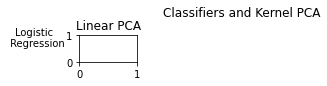

In [ ]:
def BoundaryLine(kernel, algo, algo_name):
    reduction = KernelPCA(n_components=2, kernel = kernel)
    x_train_reduced = reduction.fit_transform(X_train)
    x_test_reduced = reduction.transform(X_test)
    
    classifier = algo
    classifier.fit(x_train_reduced, Y_train)
    
    y_pred = classifier.predict(x_test_reduced)
    

    #Boundary Line
    X_set, y_set = np.concatenate([x_train_reduced, x_test_reduced], axis = 0), np.concatenate([Y_train, Y_test], axis = 0)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.5, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    #plt.title('{} Boundary Line with {} PCA' .format(algo_name, kernel))
    #plt.xlabel('Component 1')
    #plt.ylabel('Component 2')
    #plt.legend()
    plt.xticks(fontsize = 3)
    plt.yticks(fontsize = 3)


fig = plt.figure()

fig.suptitle('Classifiers and Kernel PCA')
#Logistic Regression   
ax = plt.subplot(7,5,1)
ax.set_title('Linear PCA')
ax.set_ylabel('Logistic \n Regression', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', LogisticRegression(), "Logistic Regression")